In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df[df.isna()]

In [ ]:
df.isna().sum()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [21]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [22]:
df[df['title'].isnull() | df['text'].isnull()]
    

,Unnamed: 0,title,text,label
1,1,NaN,Did they post their votes for Hillary already?,1
43,43,NaN,True. Hillary needs a distraction and what bet...,1
162,162,NaN,All eyes on Electoral delegates. The People kn...,1
185,185,NaN,Cool,1
269,269,NaN,A leading US senator: US Supporting War in Syr...,1
...,...,...,...,...
71484,71484,NaN,Another Arab supremacist masturbation fantasy....,1
71521,71521,NaN,I'm sure they drastically changed accounting m...,1
71540,71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1
71570,71570,NaN,Ever since the powers to be assassinated JFK A...,1


In [23]:
df = df.dropna(ignore_index = True)

In [24]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
71532,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
71533,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
71534,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
71535,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71537 entries, 0 to 71536
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [28]:
df['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [27]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [30]:
df['label'].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [31]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [32]:
df['combined']=df['title']+' '+df['text']

In [33]:
df

,Unnamed: 0,title,text,label,combined
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...,...
71532,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
71533,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
71534,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
71535,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove brackets and content inside them
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    words = nltk.word_tokenize(text)
    
    # Remove stopwords, lemmatize and stem
    processed = []
    for word in words:
        if word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            stem = stemmer.stem(lemma)
            processed.append(stem)
    
    return ' '.join(processed)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
df['clean_text'] = df['combined'].apply(preprocess_text)


In [40]:
df.drop(columns='Unnamed: 0', inplace=True)

In [41]:
df

,label,clean_text
0,1,law enforc high alert follow threat cop white ...
1,1,unbeliev obama attorney gener say charlott rio...
2,0,bobbi jindal rais hindu us stori christian con...
3,1,satan russia unv imag terrifi new supernuk wes...
4,1,time christian group sue amazon splc design ha...
...,...,...
71532,0,russian steal research trump hack u democrat p...
71533,1,watch giuliani demand democrat apolog trump ra...
71534,0,migrant refus leav train refuge camp hungari m...
71535,0,trump tussl give unpopular mexican leader much...


In [49]:
def gap(text):
    text=text.split()
    return text

In [53]:
df['clean_text']  =  df['clean_text'].apply(gap)

In [57]:
df['clean_text_str'] = df['clean_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')


In [58]:
df

,label,clean_text,clean_text_str
0,1,"[law, enforc, high, alert, follow, threat, cop...",law enforc high alert follow threat cop white ...
1,1,"[unbeliev, obama, attorney, gener, say, charlo...",unbeliev obama attorney gener say charlott rio...
2,0,"[bobbi, jindal, rais, hindu, us, stori, christ...",bobbi jindal rais hindu us stori christian con...
3,1,"[satan, russia, unv, imag, terrifi, new, super...",satan russia unv imag terrifi new supernuk wes...
4,1,"[time, christian, group, sue, amazon, splc, de...",time christian group sue amazon splc design ha...
...,...,...,...
71532,0,"[russian, steal, research, trump, hack, u, dem...",russian steal research trump hack u democrat p...
71533,1,"[watch, giuliani, demand, democrat, apolog, tr...",watch giuliani demand democrat apolog trump ra...
71534,0,"[migrant, refus, leav, train, refuge, camp, hu...",migrant refus leav train refuge camp hungari m...
71535,0,"[trump, tussl, give, unpopular, mexican, leade...",trump tussl give unpopular mexican leader much...


In [59]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text_str'])

In [60]:
X

<71537x279267 sparse matrix of type '<class 'numpy.float64'>'
	with 13625211 stored elements in Compressed Sparse Row format>

In [62]:
y = df['label']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = clf.predict(X_test)

In [70]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
import seaborn as sns

Accuracy: 93.37%


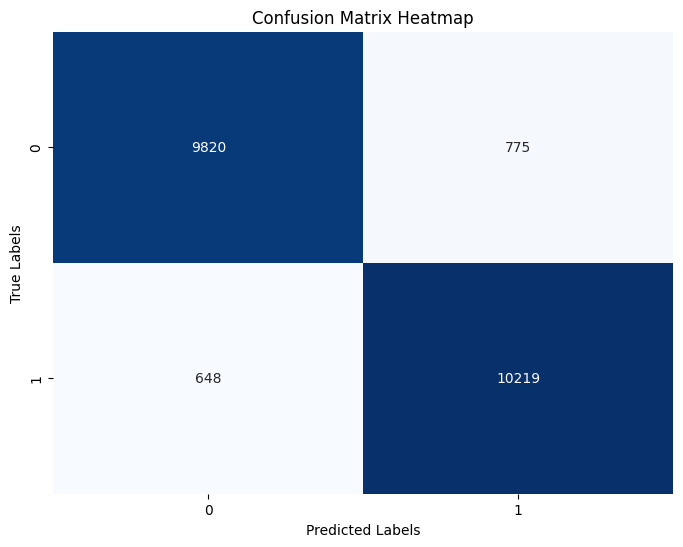

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()